In [21]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import os, json
from scipy.interpolate import InterpolatedUnivariateSpline, interp1d

In [2]:
data_folder = '/Users/lastaw/Documents/paper/code/traj/2dDeepSDF/data/random_obstacle/trajectories'
filenames = glob(os.path.join(data_folder, '*.json'))

In [9]:
data = json.load(open(filenames[0], 'r'))

In [10]:
filenames[0]

'/Users/lastaw/Documents/paper/code/traj/2dDeepSDF/data/random_obstacle/trajectories/000779.json'

In [ ]:
json_file = {}

In [18]:
#loop through all the data to consider all traj. Here i take only one traj
sample = np.array(data['1'])

In [19]:
def spline(sample):
    data_sorted = np.array(sorted(sample, key=lambda x: x[0]))
    s = interp1d(data_sorted[:,0], data_sorted[:,1])
    return s

In [22]:
s = spline(sample)

In [23]:
x = sample[:,0]

In [29]:
x_new = np.linspace(np.min(x), np.max(x), num=10)

In [30]:
y_new = s(x_new)

In [43]:
y_new

array([62.        , 57.17333187, 53.37040329, 49.56747471, 46.32695181,
       43.11533278, 39.90371375, 34.53231933, 26.95297182, 19.        ])

In [44]:
sample_new = np.stack([x_new, y_new], axis=1)

In [45]:
sample_new

array([[27.        , 62.        ],
       [30.33333333, 57.17333187],
       [33.66666667, 53.37040329],
       [37.        , 49.56747471],
       [40.33333333, 46.32695181],
       [43.66666667, 43.11533278],
       [47.        , 39.90371375],
       [50.33333333, 34.53231933],
       [53.66666667, 26.95297182],
       [57.        , 19.        ]])

In [ ]:
def spline(sample):
    data_sorted = np.array(sorted(sample, key=lambda x: x[0]))
    s = interp1d(data_sorted[:,0], data_sorted[:,1])
    return s

In [ ]:
def interpolate_traj(sample, n_points):
    ###############
    def spline(sample):
        data_sorted = np.array(sorted(sample, key=lambda x: x[0]))
        s = interp1d(data_sorted[:,0], data_sorted[:,1])
        return s
    ###############
    
    s = spline(sample)
    x = sample[:,0]
    x_new = np.linspace(np.min(x), np.max(x), num=n_points)
    y_new = s(x_new)
    sample_new = np.stack([x_new, y_new], axis=1)
    return sample_new
    
    

    

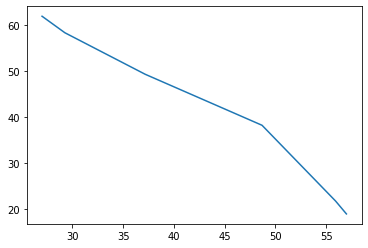

In [32]:
plt.figure()
plt.plot(x, s(x))
plt.legend(['Linear', 'InterpolatedUnivariateSpline', 'True'])
plt.show()

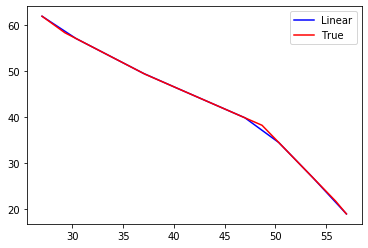

In [35]:
plt.figure()
plt.plot(x_new, y_new, 'b', x, s(x), 'r')
plt.legend(['Linear', 'True'])
plt.show()

inter script for all dataset

In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os, json
from scipy.interpolate import InterpolatedUnivariateSpline, interp1d

data_folder = '/Users/lastaw/Documents/paper/code/traj/2dDeepSDF/data_traj'
filenames = sorted(glob(os.path.join(data_folder, 'trajectories','*.json')))

def interpolate_traj(sample, n_points):
    ###############
    def spline(sample):
        data_sorted = np.array(sorted(sample, key=lambda x: x[0]))
        s = interp1d(data_sorted[:,0], data_sorted[:,1])
        return s
    ###############
    
    s = spline(sample)
    x = sample[:,0]
    x_new = np.linspace(np.min(x), np.max(x), num=n_points)
    y_new = s(x_new)
    sample_new = np.stack([x_new, y_new], axis=1)
    return sample_new

n_points = 10
for filename in tqdm(filenames) :
    file = json.load(open(filename, 'r'))
    file_new = {}
    for k in sorted(file.keys()):
        sample = np.array(file[k])
        sample_new = interpolate_traj(sample, n_points)
        file_new[k] = sample_new.tolist()
    with open(os.path.join(data_folder, 'trajectories_interpolated', os.path.split(filename)[1]), 'w') as out_path:
        json.dump(file_new, out_path)
        

Verification

In [5]:
data_folder = '/Users/lastaw/Documents/paper/code/traj/2dDeepSDF/data_traj'
filenames = sorted(glob(os.path.join(data_folder, 'trajectories_interpolated','*.json')))

In [6]:
a = json.load(open(filenames[2], 'r'))

In [7]:
all(len(a[k])==10 for k in a)

True

In [9]:
len(a)

100

Preprocess

In [10]:
data_folder = '/Users/lastaw/Documents/paper/code/traj/2dDeepSDF/data_traj'
filenames = sorted(glob(os.path.join(data_folder, 'trajectories_interpolated','*.json')))

dataset = []
for filename in filenames:
    file = json.load(open(filename, 'r'))
    for k in sorted(file.keys()):
        dataset.append(file[k])
dataset = np.array(dataset)
np.save(dataset, out_path)

Verification